In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from platform import python_version

print(python_version())

3.6.6


In [3]:
!ls

README.md        hz.ipynb         requirements.txt src


In [4]:
import torch
from src.aggregator import *
from src.datagen.sinecurve import *
from src.datagen.gpcurve import *

In [5]:
test = torch.ones(2,2,8)


In [6]:
test.shape

torch.Size([2, 2, 8])

In [7]:
a = Attention('identity', 2, 'dot_product')

In [8]:
a(test,test,test).shape

/Users/harrisonzhu/Documents/work/code/neural-processes/src/aggregator.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  weights = weight_fn(unnorm_weights)  # [B,m,n]


torch.Size([2, 2, 8])

## GP tester

- RBF
- Matern
- Additive
- Product

In [9]:
gpgen = RBFGPCurvesReader(16, 100)

In [10]:
a = gpgen.generate_curves()

In [11]:
import matplotlib.pyplot as plt

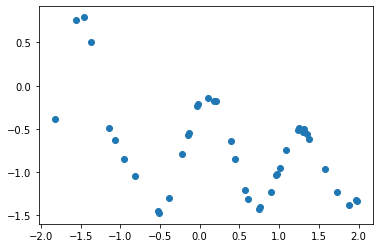

In [12]:
plt.scatter(a[0][0][0][0], a[0][0][1][0])

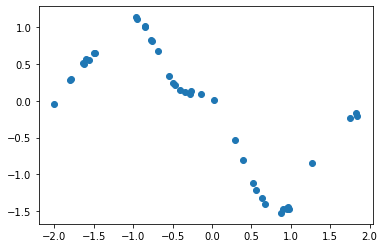

In [13]:
plt.scatter(a[0][0][0][1], a[0][0][1][1])

In [14]:
materngp = MaternGPCurvesReader(16,100)

In [15]:
a = gpgen.generate_curves()

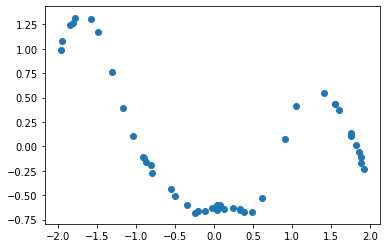

In [16]:
plt.scatter(a[0][0][0][0], a[0][0][1][0])

## Sine curve tester


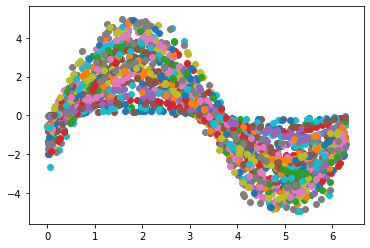

In [17]:
this = SineCurvesReader().generate_curves()
context_data_x, context_data_y = this.query[0]
context_data_x = context_data_x.squeeze()
context_data_y = context_data_y.squeeze()

context_data_x.shape
context_data_y.shape

for curve_id in range(context_data_x.shape[0]):
    plt.scatter(context_data_x[curve_id, :].tolist(), context_data_y[curve_id, :].tolist())

In [18]:
test.shape

torch.Size([2, 2, 8])

## Encoder

In [19]:
from src.decoder import *
from src.encoder import *
from src.utils import *

In [20]:
mlp = MLP(8, 3, 3, 3)

In [21]:
mlp(test)

tensor([[[ 0.5456,  0.1991, -0.4100],
         [ 0.5456,  0.1991, -0.4100]],

        [[ 0.5456,  0.1991, -0.4100],
         [ 0.5456,  0.1991, -0.4100]]], grad_fn=<AddBackward0>)

In [39]:
encoder = DeterministicMLPEncoder(7, 1, 3, 3)

In [40]:
encoder.forward(test, test)

tensor([[[ 0.0282, -0.3787, -0.4859],
         [ 0.0282, -0.3787, -0.4859],
         [ 0.0282, -0.3787, -0.4859],
         [ 0.0282, -0.3787, -0.4859]],

        [[ 0.0282, -0.3787, -0.4859],
         [ 0.0282, -0.3787, -0.4859],
         [ 0.0282, -0.3787, -0.4859],
         [ 0.0282, -0.3787, -0.4859]]], grad_fn=<AddBackward0>)